In [1]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 34.8 MB/s eta 0:00:00


In [33]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from rdkit.Chem import Descriptors
from sklearn.preprocessing import MinMaxScaler
from rdkit.Chem import rdMolDescriptors


In [9]:
df = pd.read_csv('INPUT-ML-Gaby.csv')
smiles_list = df["Smiles"]
name = df["Cmpd Label"]
# Print the entire DataFrame
print(df)

    Cmpd Label                                             Smiles  Energy(eV)
0          1ia            N#CC(=C(C)c1ccc(cc1)c1ccc(N(C)C)cc1)C#N      3.2508
1          1id                       c1cc(ccc1N(C)C)c1ccc(cc1)C#N      3.9102
2          1ir                 N(c1ccc(c2ccc(C(=O)OC)cc2)cc1)(C)C      3.9642
3          1is                 N(c1ccc(c2ccc(cc2)N(=O)=O)cc1)(C)C      3.4472
4         1iid                  N(c1ccc(c2ccc(cc2)C#N)cc1)(CCF)CC      3.9125
..         ...                                                ...         ...
319      2iiin     c1(cc2c(cc1)cc(cc2)N(CCO)CC)c1cc(oc(=O)c1C#N)C      3.1728
320       2ivc  c1(cc2c(cc1)cc(cc2)N(CCF)C)c1ccc(cn1)C(=C(C#N)...      3.1279
321       2ivk                c1(cc2c(cc1)cc(cc2)N(CCF)C)c1ncccn1      4.0412
322       2ivn      c1(cc2c(cc1)cc(cc2)N(CCF)C)c1cc(oc(=O)c1C#N)C      3.2507
323       2iic  c1(cc2c(cc1)cc(cc2)N(CC)CCF)c1ccc(cn1)C(=C(C#N...      3.1129

[324 rows x 3 columns]


# Morgan

In [10]:
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Morgan_fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mols]
len(mols)

324

In [13]:
Abs_energies = df["Energy(eV)"]

print(Abs_energies)
features = np.column_stack((Morgan_fingerprints, Abs_energies))

# Convert the RDKit fingerprint objects to NumPy arrays
fingerprints_array = [list(fp) for fp in Morgan_fingerprints]

0      3.2508
1      3.9102
2      3.9642
3      3.4472
4      3.9125
        ...  
319    3.1728
320    3.1279
321    4.0412
322    3.2507
323    3.1129
Name: Energy(eV), Length: 324, dtype: float64


In [14]:
#fitting SVR rbf kernel to dataset

with open('out-SVR-Morgan-rbf.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)


In [17]:
#fitting SVR linear kernel to dataset

with open('out-SVR-Morgan-linear.txt', 'w') as f:
  for i in np.arange(0,200):
    #splitting dataset into train and test data
    x_train, x_test, y_train, y_test = train_test_split(fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)

    print(r2_score_value, file=f)

# MACCS

In [58]:
from rdkit.Chem import MACCSkeys

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
maccs_fingerprints = [MACCSkeys.GenMACCSKeys(mol) for mol in mols]

In [59]:
Abs_energies = df["Energy(eV)"]

print(Abs_energies)
features = np.column_stack((maccs_fingerprints, Abs_energies))

# Convert the RDKit fingerprint objects to NumPy arrays
maccs_fingerprints_array = np.array([list(fp) for fp in maccs_fingerprints])

0      3.2508
1      3.9102
2      3.9642
3      3.4472
4      3.9125
        ...  
319    3.1728
320    3.1279
321    4.0412
322    3.2507
323    3.1129
Name: Energy(eV), Length: 324, dtype: float64


In [60]:
#fitting SVR rbf kernel to dataset

with open('out-SVR-MACCS-rbf.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(maccs_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
   # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    #r2_array = np.array(r2_score)
    #print(r2_array, file=f)
    print(r2_score_value, file=f)





In [61]:
# Fitting SVR linear kernel to dataset

with open('out-SVR-MACCS-linear.txt', 'w') as f:
    for i in np.arange(0, 200):
        # Splitting dataset into train and test data
        x_train, x_test, y_train, y_test = train_test_split(maccs_fingerprints_array, Abs_energies, test_size=0.20, random_state=i)
        regressor = SVR(kernel='linear')
        regressor.fit(x_train, y_train)
        # Evaluate the model on the testing dataset
        y_pred = regressor.predict(x_test)
        mean_squared_error(y_test, y_pred)
        r2_score_value = r2_score(y_test, y_pred)
        print(r2_score_value, file=f)

# Avalon

In [23]:
pip install rdkit-pypi avalon_framework

  Preparing metadata (setup.py) ... done
  Created wheel for avalon_framework: filename=avalon_framework-1.8.2-py3-none-any.whl size=3863 sha256=74f05aee2ce677c7a0b6620fcb06bc91b20862a1c43068388a01da82414fd36c
  Stored in directory: /root/.cache/pip/wheels/78/3f/5c/a65bfa8ce94f62739865cf30e5687272ee719961b4311d05e3
Successfully built avalon_framework


In [24]:
from rdkit import Chem
from rdkit.Avalon import pyAvalonTools

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
avalon_fingerprints = [pyAvalonTools.GetAvalonFP(mol) for mol in mols]
avalon_fingerprints_array = [list(fp) for fp in avalon_fingerprints]

In [25]:
Abs_energies = df["Energy(eV)"]

features = np.column_stack((avalon_fingerprints, Abs_energies))

In [26]:
#fitting SVR rbf kernel to dataset

with open('out-SVR-Avalon-rbf.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(avalon_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    print(r2_score_value, file=f)

In [27]:
#fitting SVR linear kernel to dataset

with open('out-SVR-Avalon-linear.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(avalon_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    print(r2_score_value, file=f)

# Daylight

In [41]:
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
daylight_fingerprints = [Chem.RDKFingerprint(mol) for mol in mols]
daylight_fingerprints_array = [list(fp) for fp in daylight_fingerprints]

In [43]:
Abs_energies = df["Energy(eV)"]

features = np.column_stack((daylight_fingerprints, Abs_energies))

In [44]:
#fitting SVR rbf kernel to dataset

with open('out-SVR-daylight-rbf.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(daylight_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    print(r2_score_value, file=f)

In [45]:
#fitting SVR linear kernel to dataset

with open('out-SVR-daylight-linear.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(daylight_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    print(r2_score_value, file=f)

# Atom Pairs

In [46]:
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
atom_pairs_fingerprints = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol) for mol in mols]
atompairs_fingerprints_array = [list(fp) for fp in atom_pairs_fingerprints ]

In [47]:
Abs_energies = df["Energy(eV)"]

features = np.column_stack((atom_pairs_fingerprints, Abs_energies))

In [48]:
#fitting SVR rbf kernel to dataset

with open('out-SVR-atompairs-rbf.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(atompairs_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    print(r2_score_value, file=f)

In [49]:
#fitting SVR linear kernel to dataset

with open('out-SVR-atompairs-linear.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(atompairs_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    print(r2_score_value, file=f)

# Topological torsion

In [50]:
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
torsion_fingerprints = [rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol) for mol in mols]
torsion_fingerprints_array = [list(fp) for fp in torsion_fingerprints ]

In [53]:
Abs_energies = df["Energy(eV)"]

features = np.column_stack((torsion_fingerprints, Abs_energies))

In [54]:
#fitting SVR rbf kernel to dataset

with open('out-SVR-torsion-rbf.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(torsion_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    print(r2_score_value, file=f)

In [55]:
#fitting SVR linear kernel to dataset

with open('out-SVR-torsion-linear.txt', 'w') as f:
  for i in np.arange(0,200):
    x_train, x_test, y_train, y_test = train_test_split(torsion_fingerprints_array, Abs_energies, test_size=0.20, random_state = i)
    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
  # Evaluate the model on the testing dataset
    y_pred = regressor.predict(x_test)
    mean_squared_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)
    print(r2_score_value, file=f)

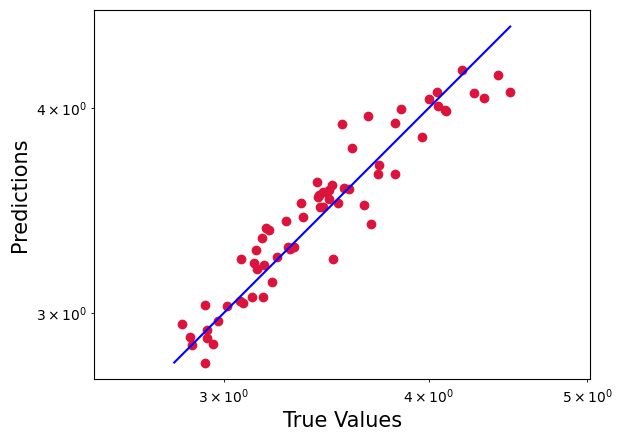

In [57]:
#checking the correlation between predicted values and true values

plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()